# Processo de análise de dados - Estudo de caso 1
Investigar esse conjunto de dados sobre propriedades físico-químicas e classificações de qualidade de amostras de vinhos tintos e brancos.

Link para o conjunto de dados: [UCI Machining Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

## Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 

### Attribute Information:

For more information, read [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016).
Input variables (based on physicochemical tests): 
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Output variable(based on sensory data): 
12. quality (score between 0 and 10)

## 1. Avaliando dados
Use o espaço abaixo para explorar os arquivos `winequality-red.csv` e `winequality-white.csv` para responder as perguntas do teste abaixo.

Perguntas:

* número de amostras em cada conjunto de dados
* número de colunas em cada conjunto de dados
* recursos com valores faltantes
* linhas duplicadas no conjunto de dados sobre vinho branco
* número de valores únicos para qualidade em cada conjunto de dados
* densidade média do conjunto de dados sobre vinho tinto

In [1]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
# import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [2]:
# load dados
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
# verificando a importação red wine
print('tinto')
red_df.head()

tinto


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# verificando a importação white wine
print('branco')
white_df.head()

branco


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# alterando as nome das colunas
red_df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides','free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
white_df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides','free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [6]:
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# número de amostra de vinho tinto
print('Número de amostras de vinho tinto é {} e número de colunas é {}'.format(
    red_df.shape[0], red_df.shape[1]))
print('Número de amostras de vinho branco é {} e número de colunas é {}'.format(
    white_df.shape[0], white_df.shape[1]))

Número de amostras de vinho tinto é 1599 e número de colunas é 12
Número de amostras de vinho branco é 4898 e número de colunas é 12


In [8]:
# recursos com valores faltantes
print('tinto')
red_df.isnull().sum()

tinto


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
print('branco')
white_df.isnull().sum()

branco


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# linhas duplicadas no conjunto de dados sobre vinho branco
print("Amostras duplicadas do tinto: {0} \nAmostras duplicadas branco: {1}".format(
        red_df.duplicated().sum(),white_df.duplicated().sum()))

Amostras duplicadas do tinto: 240 
Amostras duplicadas branco: 937


In [11]:
# Quantos valores únicos de qualidade existem no conjunto de dados sobre vinho tinto?
print('Valore únicos de qualidade no vinho tinto é de {0} amostras e no vinho branco é de {1} amostras'.format(
    red_df['quality'].nunique(),white_df['quality'].nunique()))

Valore únicos de qualidade no vinho tinto é de 6 amostras e no vinho branco é de 7 amostras


In [12]:
# Qual é a densidade média do conjunto de dados sobre vinho tinto?
print('Densidade média do vinho tinto: {0}\nDensidade média do vinho branco: {1}'.format(
red_df['density'].mean(), white_df['density'].mean()))

Densidade média do vinho tinto: 0.9967466791744833
Densidade média do vinho branco: 0.9940273764801896


## 2. Anexando dados
Use o NumPy para criar uma nova coluna que preserva as informações de cores e, então, use o Pandas para combinar os dataframes.

### Crie colunas de cor
Crie dois vetores de tamanho igual ao número de linhas nos dataframes tinto e branco que repetem o valor “red” or “white”. O NumPy oferece uma forma bem fácil de fazer isso. Aqui está a documentação para a função [repeat do NumPy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html). Dê uma olhada e tente você mesmo.

In [13]:
# crie vetor de cor para o dataframe tinto
color_red = np.repeat('red',red_df.shape[0])

# crie vetor de cor para o dataframe branco
color_white = np.repeat('white',white_df.shape[0])

Adicione os vetores de cor aos dataframes tinto e branco. Faça isso associando uma nova coluna chamada 'color' ao vetor apropriado. A célula abaixo faz isso para o dataframe tinto.

In [14]:
red_df['color'] = color_red
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
white_df['color'] = color_white
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Combine dataframes com append
Documentação para a função [append do Pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html), pode usar isso para descobrir como combinar os dataframes. (Bonus: Por que não estamos usando o método [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) para combinar dataframes?) Se você não entender, vou te mostrar como mais tarde.

In [16]:
# anexando os dataframes
wine_df = white_df.append(red_df, ignore_index=True)

# exiba o dataframe para ver se tudo deu certo
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [17]:
# número da combinação
print(" Branco Original:{0} \n Tinto Original:{1}\n Combinado:{2}".format(
    white_df.shape, red_df.shape, wine_df.shape))

 Branco Original:(4898, 13) 
 Tinto Original:(1599, 13)
 Combinado:(6497, 13)


### Salve o dataset combinado
Salvando o dataframe recém-combinado como `winequality_edited.csv`. OBS: `index=False` para evitar salvar com uma coluna não-nomeada!

In [18]:
wine_df.to_csv("../doc/winequality_edited.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../doc/winequality_edited.csv'

## 3. EDA com visualizações
Crie visualizações para resoponder as perguntas do teste abaixo deste notebook.
* Baseado em histogramas de colunas neste conjunto de dados, qual das seguintes variáveis de características aparece distorcida para a direita? Acidez fixa, total de dióxido de enxofre, pH, álcool
* Baseado em gráficos de dispersão de qualidade em relação a variáveis de características diferentes, qual dos seguintes tem mais probabilidade de impactar a qualidade? Acidez volátil, açúcar residual, pH, álcool

### Histogramas para diversas características

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e1a6b70>,
      dtype=object)

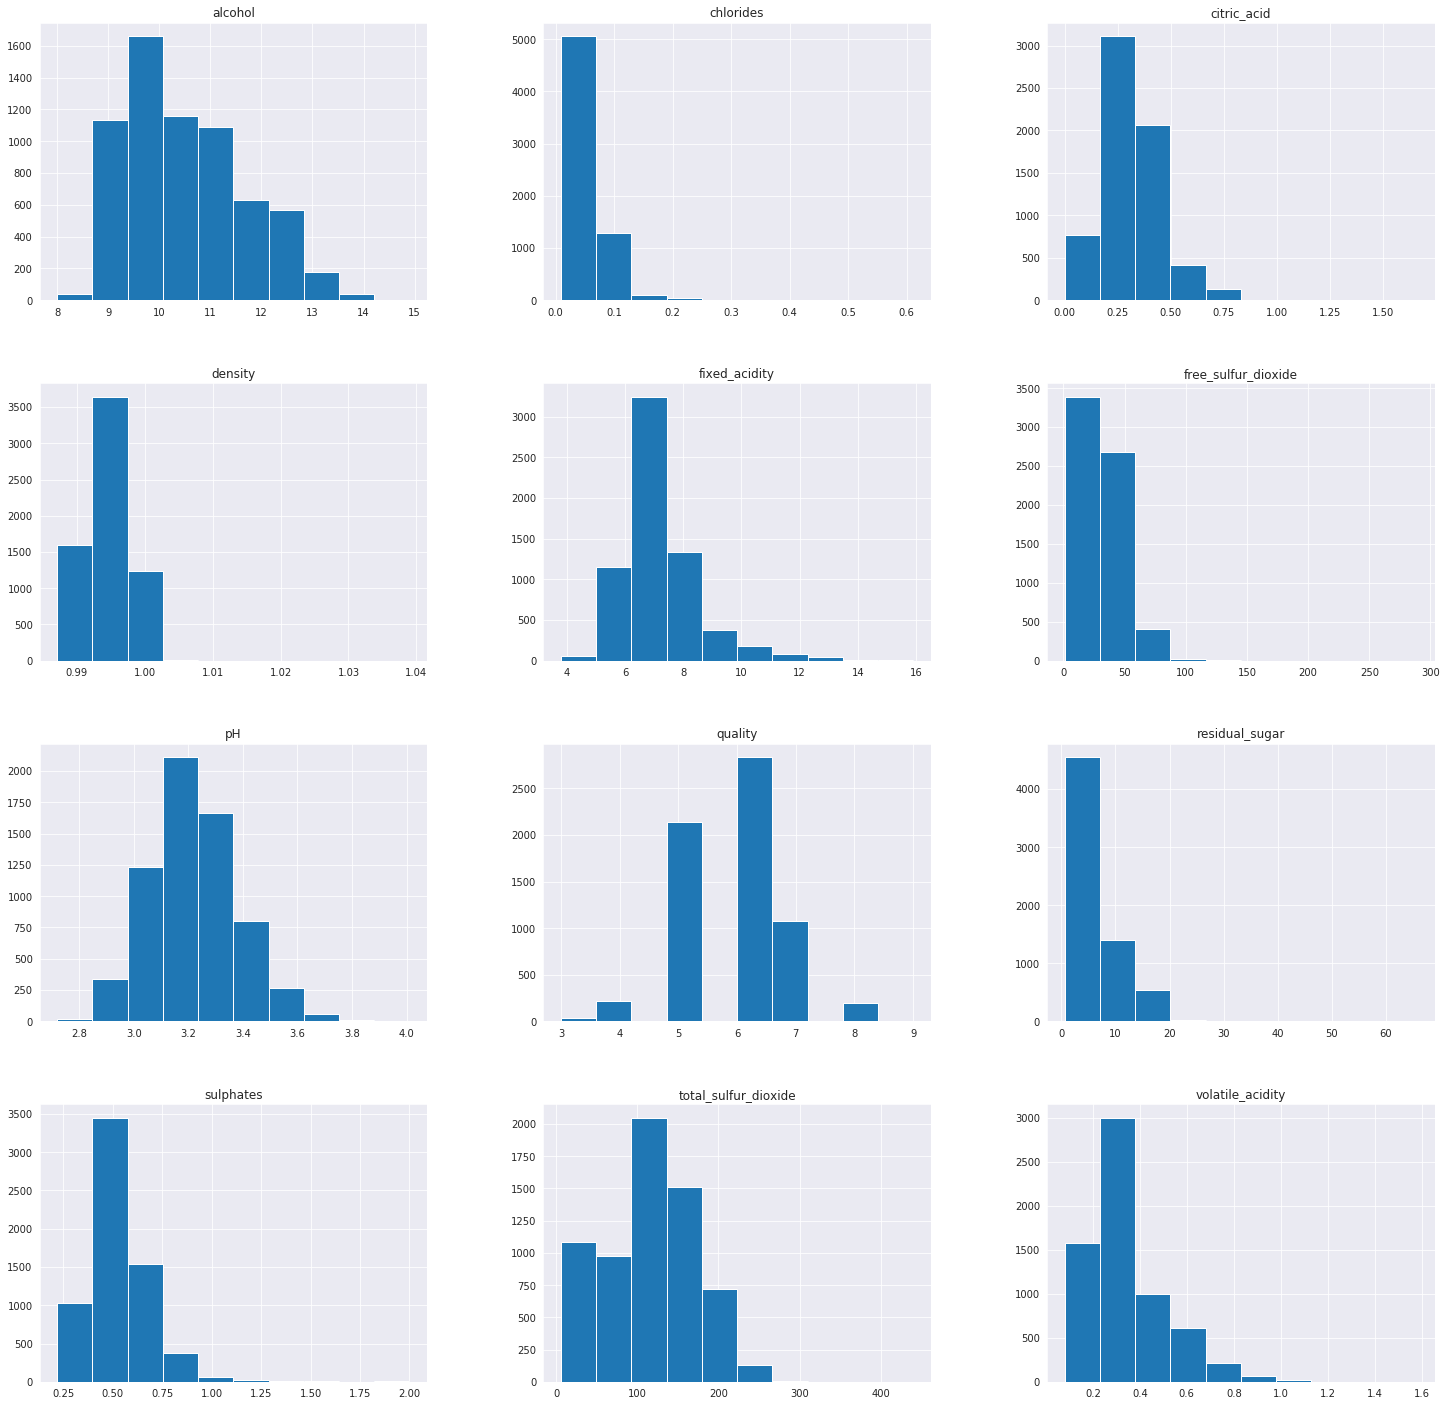

In [19]:
wine_df.hist( figsize=(25,25))
# wine_df.plot(figsize=(15,15), kind='hist')

## 4. Tirando conclusões usando groupby

### P1: Existe um certo tipo de vinho (tinto ou branco) associado a uma melhor qualidade?
Para esta pergunta, compare a qualidade média do vinho tinto à qualidade média do vinho branco, com o groupby. Faça esse grupo por cor e, depois, encontre a qualidade média de cada grupo.

In [20]:
# qualidade média do vinho por cor
wine_df.groupby(['color']).mean()['quality']


color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [21]:
if (wine_df.groupby(['color']).mean()['quality'][0] > wine_df.groupby(['color']).mean()['quality'][1]):
    valor = 'tinto é maior'
else:
    valor = 'tinto é menor'
print('A qualidade média do vinho {0} vinho branco?'.format(valor))

A qualidade média do vinho tinto é menor vinho branco?


In [22]:
# encontre a qualidade média de cada grupo
wine_df.groupby('color').mean()['quality']

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### P2: Qual nível de acidez (valor de pH) recebe a classificação média mais alta?
Essa pergunta é mais complicada porque, ao contrário da cor, que possui categorias claras pelas quais você pode agrupar (tinto ou branco), pH é uma variável quantitativa, sem categorias claras. No entanto, existe uma solução simples para isso. Você pode criar uma variável categórica de uma variável quantitativa criando suas próprias categorias. A função Cut do Pandas permite que você “corte” os dados em grupos. Usando essa função, crie uma nova coluna chamada nível_acidez com essas categorias.
#### Níveis de acidez:
1. Alto: Abaixo de 25% dos valores de pH
2. Moderadamente alto: 25% a 50% dos valores de pH
3. Médio: 50% a 75% dos valores de pH
4. Baixo: 75% ou mais dos valores de pH

Aqui, os dados estão sendo divididos nos percentuais 25, 50 e 75. Lembre-se, você pode obter esses números com a função describe() do Pandas! Depois de criar essas quatro categorias, você será capaz de usar groupby para conseguir a classificação de qualidade média para cada nível de acidez.

In [23]:
# valores de pH com Pandas describe: min, 25%, 50%, 75% e max
ph_desc = wine_df["pH"].describe()
ph_desc

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [24]:
# intervalos que serão usados para dividir os dados em grupos (extremos: min to 25%, 25% to 50% ...)
bin_edges = [ph_desc['min'] ,ph_desc["25%"] , ph_desc["50%"] ,ph_desc["75%"], ph_desc["max"]] # Preencha esta lista com os cinco valores que você acabou de encontrar
bin_edges

[2.72, 3.11, 3.21, 3.32, 4.01]

In [25]:
# Rótulos para os quadro grupos de nível de acidez (min to 25% é "Alto", 25% to 50% é "Moderado Alto" ...)
bin_names = ["Alto" ,"Moderadamente Alto" ,"Médio" ,"Baixo" ] # Nomeie cada categoria de nível de acidez
bin_names

['Alto', 'Moderadamente Alto', 'Médio', 'Baixo']

In [26]:
# Cria a coluna acidity_levels
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names) #cada pH aplicando bin_edges

# Verifica se esta coluna foi criada corretamente
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,Alto
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Médio
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Médio
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderadamente Alto
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderadamente Alto


In [27]:
# Encontre a qualidade média de cada nível de acidez com groupby
quality_acidity_level = wine_df.groupby(["acidity_levels"]).mean()['quality']
quality_acidity_level

acidity_levels
Alto                  5.783343
Moderadamente Alto    5.784540
Médio                 5.850832
Baixo                 5.859593
Name: quality, dtype: float64

In [28]:
print('Qual nível de acidez recebe a classificação média mais alta?')
print('RESP: O nível de acidez **{0}** recebe a classificação média mais alta'.format(
quality_acidity_level.idxmax()))

Qual nível de acidez recebe a classificação média mais alta?
RESP: O nível de acidez **Baixo** recebe a classificação média mais alta


In [29]:
# Salve alterações para a próxima seção
wine_df.to_csv('winequality_edited.csv', index=False)

## 5. Tirando conclusões usando query

### P1: Vinhos com maior teor alcoólico recebem classificações maiores?
criar dois grupos de amostras de vinho:

1. Baixo álcool (amostras com um teor alcoólico abaixo da média)
2. Alto álcool (amostras com um teor alcoólico maior ou igual à média)

Em seguida, encontre a classificação média de qualidade de cada grupo.

In [30]:
# dados
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,Alto
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Médio
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Médio
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderadamente Alto
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderadamente Alto


In [31]:
# para o alcohol
wine_df['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [32]:
# valor da mediana do teor alcóolico
alcohol_median = wine_df['alcohol'].median()
print('valor da mediana do teor alcóolico: {0}'.format(
alcohol_median))

valor da mediana do teor alcóolico: 10.3


In [33]:
# valor da média do teor alcóolico
alcohol_mean = wine_df['alcohol'].mean()
print('valor da média do teor alcóolico: {0}'.format(
alcohol_mean))

valor da média do teor alcóolico: 10.491800831152897


In [34]:
# selecione amostras com teor alcóolico abaixo da mediana
low_alcohol = wine_df.query('alcohol < @alcohol_median')
# selecione amostras com teor alcóolico maior ou igual à mediana
high_alcohol = wine_df.query('alcohol >= @alcohol_median')
# certificando que estas consultas incluíram cada amostra uma única vez
num_samples = wine_df.shape[0]
print('shape[0] do df: {}'.format(num_samples))
print('verificando consultas incluíram cada amostra uma única vez: ', num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()) # resultado deve ser True

shape[0] do df: 6497
verificando consultas incluíram cada amostra uma única vez:  True


In [35]:
mean_quality_high_alcohol = high_alcohol['quality'].mean()
mean_quality_low_alcohol = low_alcohol['quality'].mean()

In [36]:
# obtenha a avaliação média de qualidade para grupos com alto e baixo teor
print('Avaliação média de qualidade para grupos com alto teor alcóolico: {0} \nAvaliação média para baixo teor alcóolico: {1}'.format(
mean_quality_high_alcohol, mean_quality_low_alcohol))

Avaliação média de qualidade para grupos com alto teor alcóolico: 6.146084337349397 
Avaliação média para baixo teor alcóolico: 5.475920679886686


### P2: Vinhos mais doces (mais açúcar residual) recebem classificações maiores?
Da mesma forma, use a mediana para dividir as amostras em dois grupos, por açúcar residual, e encontre a classificação média de qualidade de cada grupo

In [37]:
#dados
wine_df.head()

wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [38]:
# obtenha o valor mediano do nível de açúcar residual
sugar_median = wine_df['residual_sugar'].median()
print('sugar_median: {0}'.format(sugar_median))

sugar_median: 3.0


In [39]:
# selecione amostras com nível de açúcar residual abaixo da mediana
low_sugar = wine_df.query('residual_sugar < @sugar_median')
low_sugar
# selecione amostras com nível de açúcar residual maior ou igual à mediana
high_sugar = wine_df.query('residual_sugar >= @sugar_median')

# certifique-se que estas consultas incluíram cada amostra uma única vez
teste = (num_samples == low_sugar['quality'].count() + high_sugar['quality'].count())
teste
print('verificando consultas incluíram cada amostra uma única vez: {0}'.format(teste)) # resultado deve ser True

verificando consultas incluíram cada amostra uma única vez: True


In [40]:
mean_quality_low_sugar = low_sugar['quality'].mean()
mean_quality_high_sugar = high_sugar['quality'].mean()

In [41]:
# obtenha a avaliação média de qualidade para grupos com alto e baixo nível de açúcar residual
print('Avaliação média de qualidade para grupos com alto nível de açucar: {0} \nAvaliação média para baixo nível de açucar: {1}'.format(
    mean_quality_high_sugar, mean_quality_low_sugar))

Avaliação média de qualidade para grupos com alto nível de açucar: 5.82782874617737 
Avaliação média para baixo nível de açucar: 5.808800743724822


## 6. Traçando gráficos com matplotlib
Use matplotlib para criar gráficos de barras que permitam visualizar as conclusões que você tirou com groupby e query.

Dois argumentos são necessários para se usar a função `bar` do pyplot: a coordenada no eixo x das barras e sua altura.
Você pode especificar os rótulos das marcações do eixo x usando a função `xticks` do pyplot, ou ainda especificando um parâmetro adicional na função `bar`. As duas células abaixo  The two cells below accomplish the same thing.

### P1: Será que vinhos com maior teor alcóolico recebem avaliações melhores?
Crie um gráfico de barras com uma barra para amostras de vinho com baixo teor alcóolico e outra para amostras com alto teor alcóolico. Esse primeiro está preenchido para você.

#### dados para alcohol
* alcohol_median
* alcohol_mean
* low_alcohol
* high_alcohol

In [42]:
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

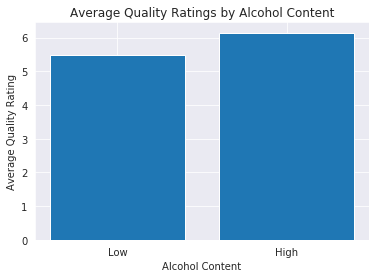

In [43]:
# gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### P2: Vinhos mais suaves recebem avaliações melhores?
Crie um gráfico de barras com uma barra para amostras de vinho com baixo nível de açúcar residual e outra para amostras com alto nível de açúcar residual.

In [44]:
# selecionar cada grupo e obter sua qualidade média
# foi calculado: # low_sugar # high_sugar

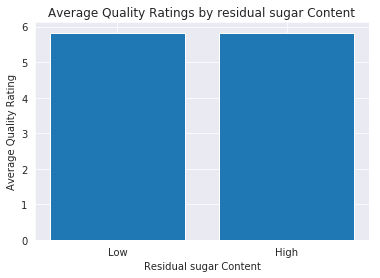

In [45]:
# gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by residual sugar Content')
plt.xlabel('Residual sugar Content')
plt.ylabel('Average Quality Rating');

### P3: Qual o nível de acidez que recebe a maior avaliação média?
Crie um gráfico de barras com uma barra para cada um dos quatro níveis de acidez.

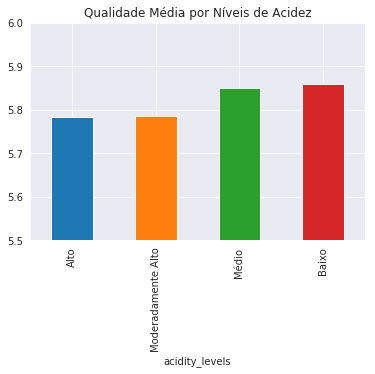

In [46]:
# obter a qualidade média para cada nível de acidez
quality_mean_acidity_levels = wine_df.groupby(['acidity_levels']).mean()['quality'] 

# gráfico de barras com rótulos adequados
quality_mean_acidity_levels.plot(
    kind='bar', ylim=(5.5, 6),title='Qualidade Média por Níveis de Acidez')

## 7. Traçando gráficos com tipo de vinho e qualidade com matplotlib

### Crie vetores para as alturas das barras correspondentes aos vinhos tinto e branco
Lembre-se, existe uma barra para cada combinação de tipo de vinho e avaliação de qualidade. A altura de cada barra é baseada na proporção de amostras daquele tipo com aquela avaliação de qualidade.
1. Proporções das barras de vinho tinto = contagens para cada avaliação de qualidade / número total de amostras de vinho tinto
2. Proporções das barras de vinho branco = contagens para cada avaliação de qualidade / número total de amostras de vinho branco

In [47]:
# obtenha as contagens para cada avaliação e tipo de vinho
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [48]:
# obtenha a contagem total para cada tipo de vinho
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [49]:
# obtenha proporções dividindo as contagens das avaliações dos vinhos tintos pelo número total de amostras de vinho tinto
red_proportions = color_counts['red'] / color_totals['red']
red_proportions
# está faltando um valor de vinho tinto para a avaliação 9. Embora esteja número seja 0,
# precisamos dele para nosso gráfico.
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [50]:
# obtenha proporções dividindo as contagens das avaliações dos vinhos brancos pelo número total de amostras de vinho branco
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Trace as proporções em um gráfico de barras
Defina a localização no eixo x para cada grupo de avaliação e a largura de cada barra

In [51]:
ind = np.arange(len(red_proportions))  # a localização no eixo x dos grupos
width = 0.35       # a largura das barras

Agora vamos criar o gráfico.

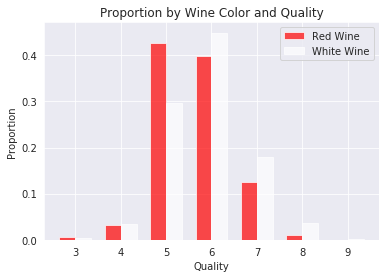

In [52]:
# trace as barrass
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# título e rótulos
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + (width / 2)  # localização dos marcadores no eixo x
labels = ['3', '4', '5', '6', '7', '8', '9']  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels)

# legenda
plt.legend()